In [173]:
import networkx as nx
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import igraph as ig
from collections import Counter

In [ ]:
points_ex = [(i,i,i,i) for i in range(100)]
#points_ex.pop(0)
print(points_ex)

In [ ]:
def d(p,q):
    ""
    return np.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2+(p[2]-q[2])**2+(p[3]-q[3])**2)

In [ ]:
d((1,1,1,1),(2,2,2,2))

In [ ]:
def distancer(ps):
    ""
    nps = len(ps)
    return np.array([[d(ps[i],ps[j]) for j in range(nps)] for i in range(nps)])

In [ ]:
distancer(points_ex)

In [ ]:
def graphmachine(distances, eps):
    ""
    graph = {}
    nverts = np.shape(distances)[0]
    for i in range(nverts):
        graph[i] = []
        for j in range(nverts):
            if distances[i,j] <= eps and i != j:
                graph[i].append(j)
    return graph

In [ ]:
graph4 = graphmachine(distancer(points_ex), 4)

In [ ]:
def is_simplex(g,vs):
    ""
    for i in vs:
        for j in vs:
            if i != j and j not in g[i]:
                return False
    return True

In [ ]:
def simplices(g,k):
    ""
    ss = []
    for i in g.keys():
        vvs = [j for j in g[i] if j > i]
        for subset in itertools.combinations(vvs,k):
            if is_simplex(g,subset):
                ss.append((i,) + subset)
    return len(ss)

In [ ]:
simplices(graph4, 1)

In [170]:
def question2func(points, estart,estop,esteps,typer):
    ""
    plt.figure(figsize=(10,10))
    eps = np.linspace(estart,estop,esteps, dtype = typer)
    dists = distancer(points)
    y=[]
    s=0
    for n in eps:
        k = graphmachine(dists, n)
        #print("This is the eps number, " ,n)
        for f in range(len(eps)):
            #print("This is the simplex k number ", f)
            a = ((-1)**f)*(simplices(k,f))
            s = s+a
            #print(s)
        y.append(s)
    return plt.plot(eps, y)
        

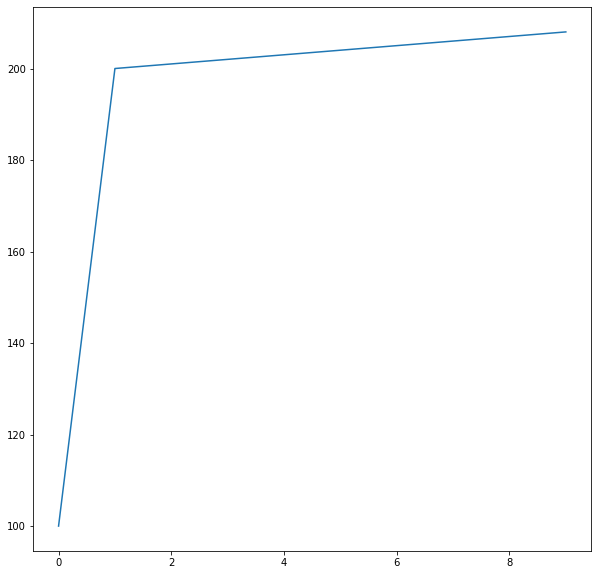

In [171]:
question2func(points_ex, 0, 9, 10, int)

In [ ]:
points_cosh = [(np.cos(t),np.cos(t),np.sin(t),np.sin(t)) for t in range(100)]

print(points_cosh)

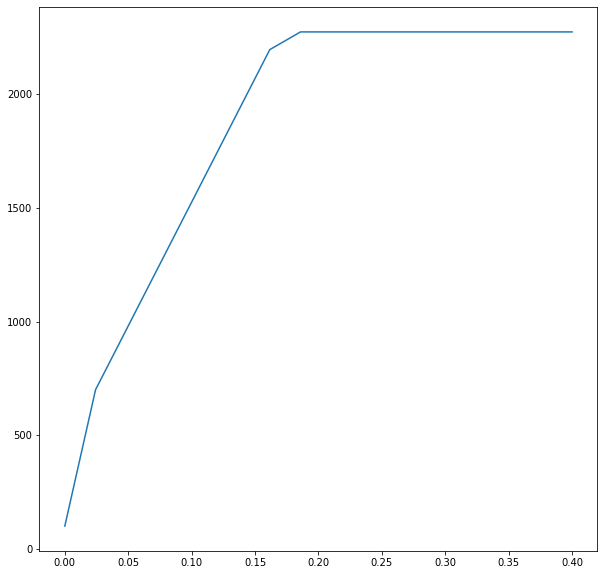

In [172]:
question2func(points_cosh, 0, 0.4, 100, float)